### Census Income
Census Income Data Set 
https://archive.ics.uci.edu/ml/datasets/census+income

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

Attribute Information:

Listing of attributes: 

>50K, <=50K. 

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
import numpy as np
import pandas as pd
#from sklearn import preprocessing
#from sklearn.naive_bayes import GaussianNB
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
train_data = pd.read_csv("../dataset/census-income/adult.data" , delimiter=',' , skipinitialspace=True 
                         , names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                                    "marital_status", "occupation" , "relationship", "race",
                                   "sex", "capital_gain" , "capital_loss", "hours_per_week","native_country","income"])

In [3]:
train_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
# Reformat Column We Are Predicting
#train_data['income']=train_data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [8]:
train_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native']

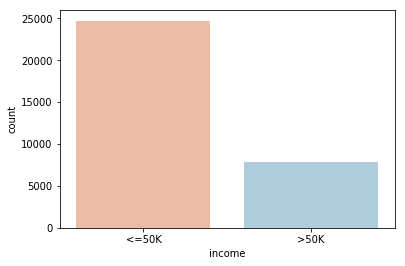

In [10]:
# Count of >50K & <=50K
sns.countplot(train_data['income'],label="Count",palette="RdBu")
plt.show()

In [11]:
#train_data.income = train_data.income.astype(object)

In [12]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [13]:
train_data['income']=train_data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [14]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


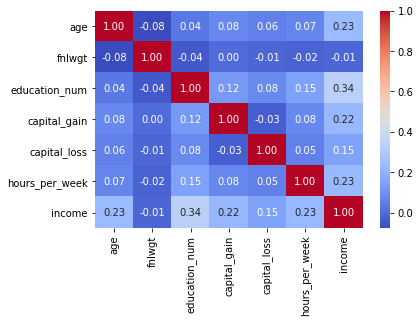

In [15]:
g = sns.heatmap(train_data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

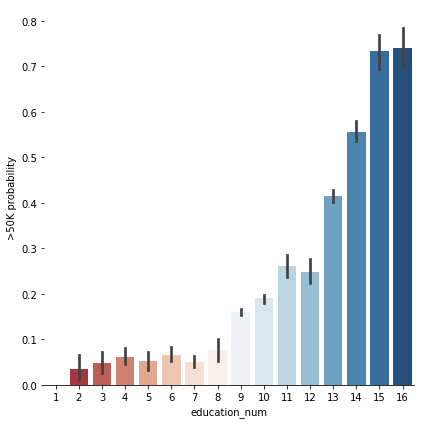

In [16]:
g = sns.factorplot(x="education_num",y="income",data=train_data,kind="bar",size = 6,palette = "RdBu")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

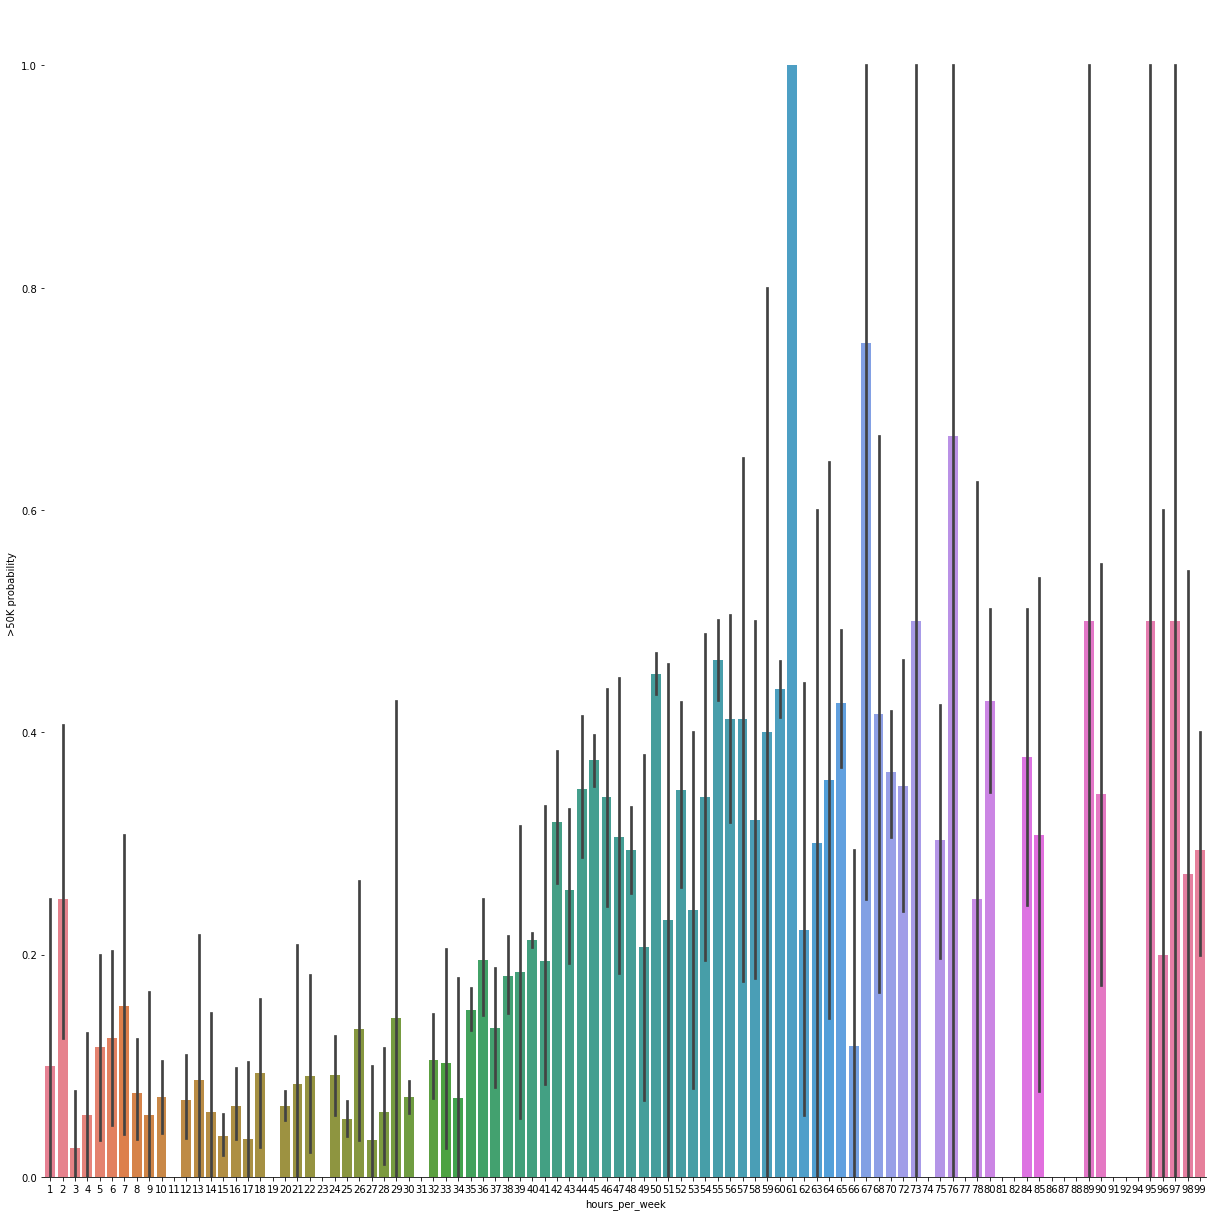

In [17]:
# Explore Hours Per Week vs Income

g  = sns.factorplot(x="hours_per_week",y="income",data=train_data,kind="bar",size = 17,palette = "husl")
g.despine(left=True)

g = g.set_ylabels(">50K probability")



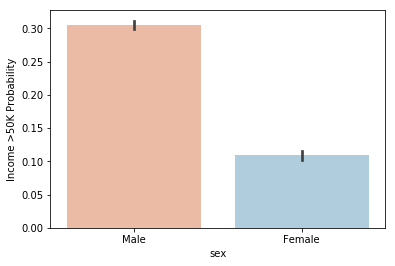

In [18]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=train_data,palette="RdBu")
g = g.set_ylabel("Income >50K Probability")
plt.show()

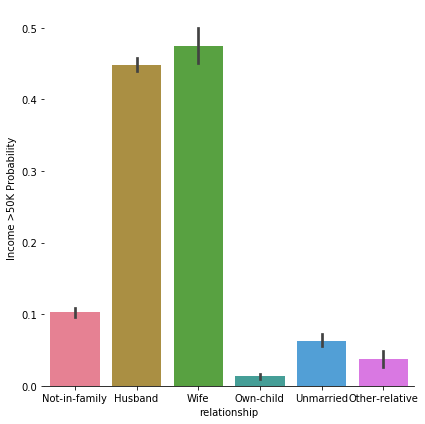

In [19]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=train_data,kind="bar", size = 6 , 
palette = "husl")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

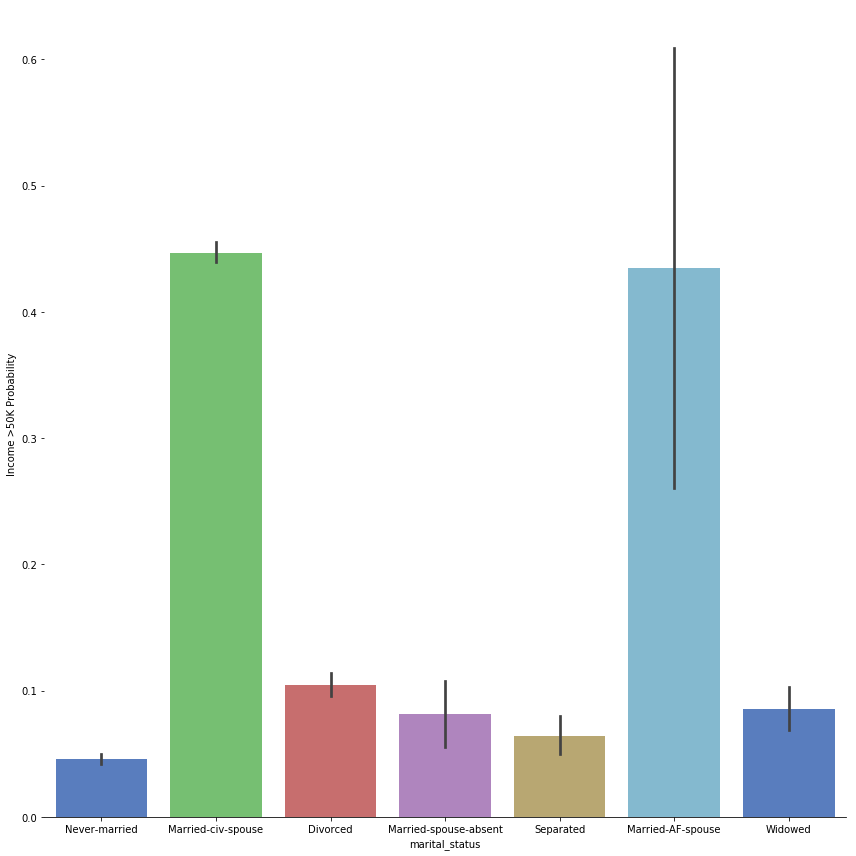

In [20]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital_status",y="income",data=train_data,kind="bar", size = 12 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [21]:
####################################################
############### FEATURE ENGINEERING ################
####################################################
# Convert Sex value to 0 and 1
train_data["sex"] = train_data["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
train_data["marital_status"] = train_data["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_data["marital_status"] = train_data["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_data["marital_status"] = train_data["marital_status"].map({"Married":1, "Single":0})


# Drop the data you don't want to use
train_data.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(train_data.head())

Dataset with Dropped Labels
   age  fnlwgt  education_num  marital_status  sex  capital_gain  \
0   39   77516             13               0    0          2174   
1   50   83311             13               1    0             0   
2   38  215646              9               0    0             0   
3   53  234721              7               1    0             0   
4   28  338409             13               1    1             0   

   capital_loss  hours_per_week  income  
0             0              40       0  
1             0              13       0  
2             0              40       0  
3             0              40       0  
4             0              40       0  


In [50]:
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables
array = train_data.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    50  83311     13 ...      0      0     13]
 [    38 215646      9 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 0 ... 0 0 1]
LR: 0.797874 (0.009279)
LDA: 0.830121 (0.005715)
KNN: 0.775837 (0.011082)
CART: 0.807740 (0.007566)
NB: 0.794572 (0.009167)
RF: 0.841062 (0.007008)


In [51]:
X_train.shape


(26048, 8)

In [52]:
X_validation.shape

(6513, 8)

In [53]:
Y_train.shape

(26048,)

In [54]:
Y_validation.shape

(6513,)

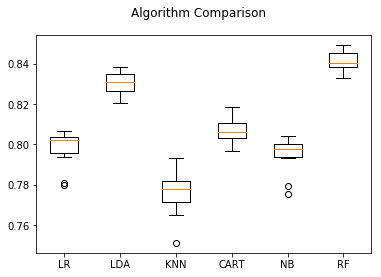

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.20082911100876%
[[4528  423]
 [ 606  956]]
             precision    recall  f1-score   support

          0       0.88      0.91      0.90      4951
          1       0.69      0.61      0.65      1562

avg / total       0.84      0.84      0.84      6513



In [28]:
#Test file
test_data = pd.read_csv("../dataset/census-income/adult.test" , delimiter=',' , skipinitialspace=True , skiprows=1
                         , names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                                    "marital_status", "occupation" , "relationship", "race",
                                   "sex", "capital_gain" , "capital_loss", "hours_per_week","native_country","income"])

test_data['income']=test_data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
# Convert Sex value to 0 and 1
test_data["sex"] = test_data["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
test_data["marital_status"] = test_data["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
test_data["marital_status"] = test_data["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
test_data["marital_status"] = test_data["marital_status"].map({"Married":1, "Single":0})

test_data.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)

X_train.shape

(26048, 8)

X_validation.shape
(6513, 8)

Y_train.shape
(26048,)

Y_validation.shape
(6513,)

In [72]:
array = train_data.values
array2 = test_data.values
X = array[:,0:8]
Y = array[:,8]

X2 = array2[:,0:8]
Y2 = array2[:,8]

X_train = X
X_validation = X2

Y_train = Y
Y_validation = Y2

In [67]:
X_train.shape

(32561, 8)

In [68]:
X_validation.shape

(16281, 8)

In [69]:
Y_train.shape

(32561,)

In [70]:
Y_validation.shape

(16281,)

In [76]:

print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)

num_folds = 10
scoring = 'accuracy'
#X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
#    test_size=validation_size,random_state=seed)


# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    50  83311     13 ...      0      0     13]
 [    38 215646      9 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 0 ... 0 0 1]
LR: 0.797427 (0.005950)
LDA: 0.830073 (0.006557)
KNN: 0.776819 (0.005449)
CART: 0.805350 (0.007181)
NB: 0.795215 (0.005340)
RF: 0.840300 (0.005950)


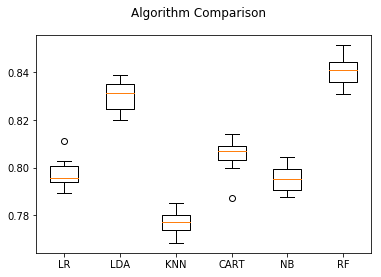

In [77]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.15330753639212%
[[11392  1043]
 [ 1537  2309]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90     12435
          1       0.69      0.60      0.64      3846

avg / total       0.84      0.84      0.84     16281

